In [1]:
# Import required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the dataset
countries_df = pd.read_csv('data/Country-data.csv')
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


**There is no null data and also no data type change is required.**

In [3]:
# Check the NAN values
100 * np.isnan(countries_df.loc[:,countries_df.columns != 'country']).sum() / countries_df.shape[1]

child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

**No NAN value in the numerical columns.**

In [4]:
countries_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
num_cols = countries_df.columns.drop('country')
num_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

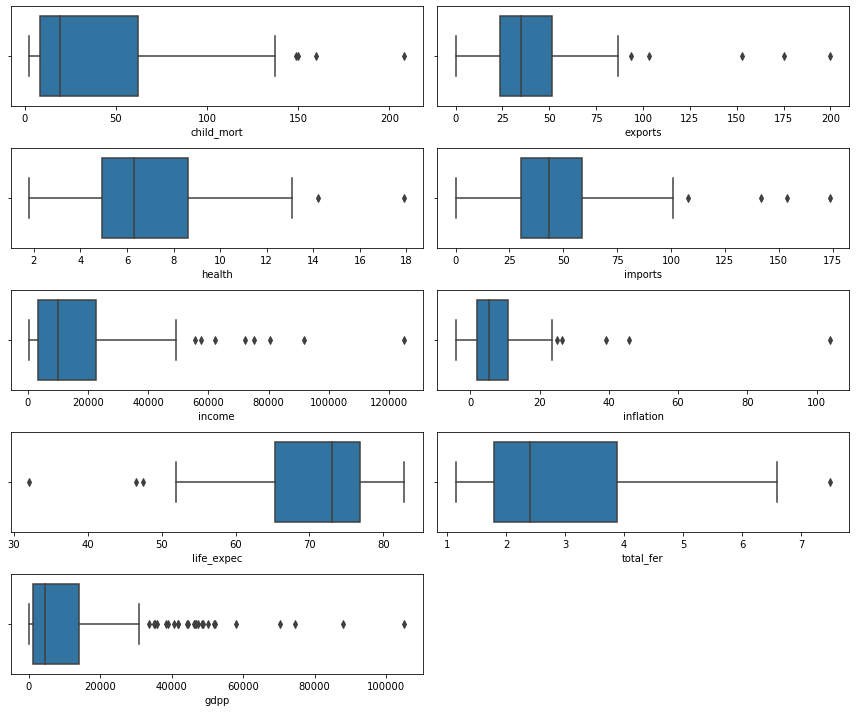

In [6]:
# Plot boxplot of each numerical column
plt.figure(figsize=(12,10))
i = 1
for x in num_cols:
    plt.subplot(5,2,i)
    sns.boxplot(countries_df[x])
    i = i+1
plt.tight_layout() 
plt.show()

In [7]:
country_col = countries_df.pop('country')

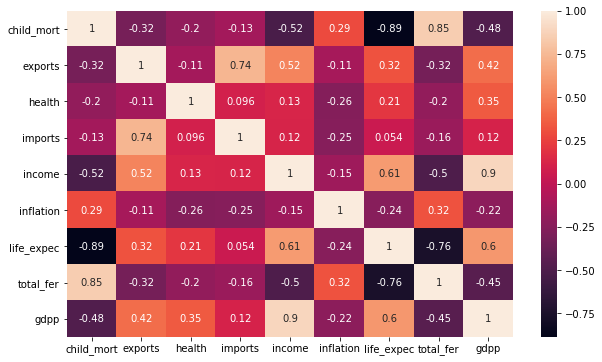

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(countries_df.corr(), annot=True)
plt.show()

## Scaling

In [9]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(countries_df)

## PCA

In [10]:
pca = PCA(random_state=42)
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [12]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [13]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
var_cumulative

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

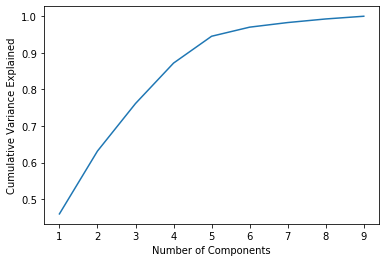

In [14]:
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot(y=var_cumulative, x=range(1,len(var_cumulative)+1))
plt.ylabel("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.show()

Here we can see, with only 5 components we can get 95% of information

In [15]:
pca = IncrementalPCA(n_components=5)
new_data = pca.fit_transform(scaled_df)
new_data.shape

(167, 5)

In [16]:
df = pd.DataFrame(new_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227
3,-2.932714,1.698771,1.525076,0.855595,-0.214778
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186


## Clustering

In [17]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
hopkins(df)

0.8120091883336136

Bases on Hopkins score sata is good for clustering

## K-Means Clustering

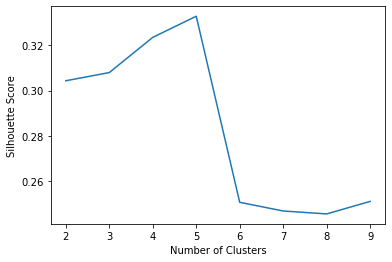

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

ss=[]
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    ss.append(silhouette_score(df, kmeans.labels_))
sns.lineplot(x=range(2,10), y=ss)
plt.ylabel('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.show()

### Elbow Curve

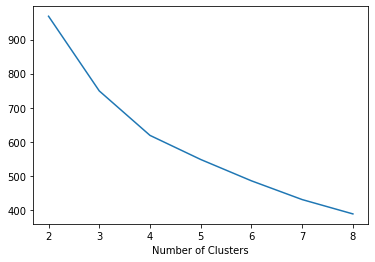

In [20]:
ssd = []
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)

sns.lineplot(x=range(2,9), y=ssd)
plt.xlabel('Number of Clusters')
plt.show()

**Silhoutte analysis suggests 5 clusters but Elbow curve suggests 3 clusters. Even in Silhoutte analysis 3 has a good score so lets go with 3 clusters**

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
cluster_df = pd.DataFrame(pd.Series(kmeans.labels_), columns=['cluster'])
original_df = pd.concat([countries_df, cluster_df], axis=1)
original_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [23]:
pc_df = pd.concat([df, cluster_df], axis=1)
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,cluster
0,-2.913000,0.091969,-0.721242,1.001838,-0.146765,1
1,0.429870,-0.589373,-0.328611,-1.165014,0.153205,2
2,-0.285289,-0.452139,1.232051,-0.857767,0.191227,2
3,-2.932714,1.698771,1.525076,0.855595,-0.214778,1
4,1.033371,0.133853,-0.216699,-0.846638,-0.193186,2


In [24]:
pc_df.cluster.value_counts()

2    84
1    47
0    36
Name: cluster, dtype: int64

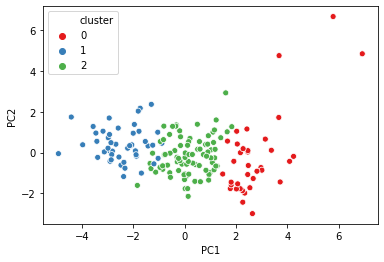

In [25]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pc_df, legend='full', palette='Set1')
plt.show()

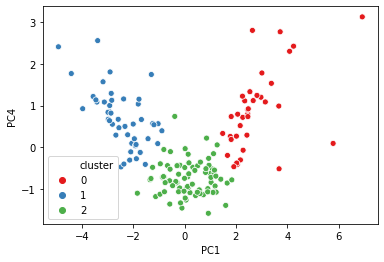

In [26]:
sns.scatterplot(x='PC1', y='PC4', hue='cluster', data=pc_df, legend='full', palette='Set1')
plt.show()

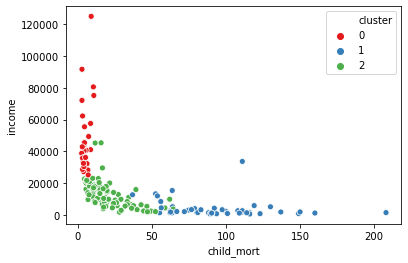

In [27]:
sns.scatterplot(x='child_mort', y='income', hue='cluster', data=original_df, legend='full', palette='Set1')
plt.show()

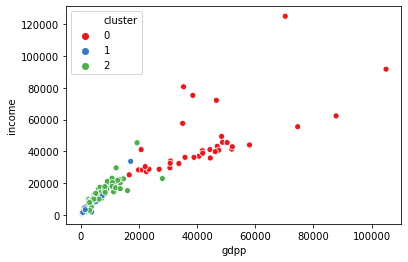

In [28]:
sns.scatterplot(x='gdpp', y='income', hue='cluster', data=original_df, legend='full', palette='Set1')
plt.show()

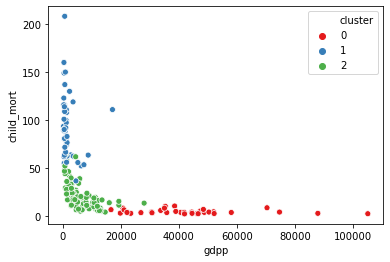

In [31]:
sns.scatterplot(x='gdpp', y='child_mort', data=original_df, legend='full', palette='Set1', hue='cluster')
plt.show()

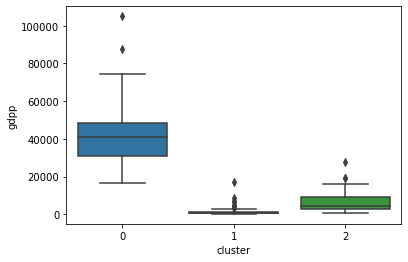

In [35]:
sns.boxplot(x='cluster', y='gdpp', data=original_df)
plt.show()

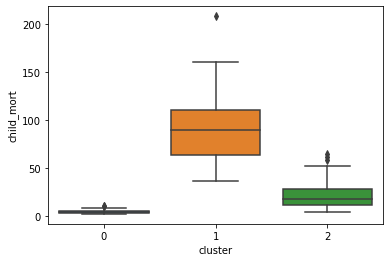

In [36]:
sns.boxplot(x='cluster', y='child_mort', data=original_df)
plt.show()

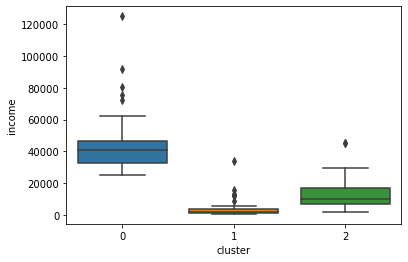

In [37]:
sns.boxplot(x='cluster', y='income', data=original_df)
plt.show()

By all these graphs we can see countries in cluster 1 need the more help

In [30]:
original_df['country']=country_col
original_df.loc[original_df.cluster==1]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,country
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,Afghanistan
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,Angola
17,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,Benin
21,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,Botswana
25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,Burkina Faso
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,Burundi
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,Cameroon
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,Central African Republic
32,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,Chad
36,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,Comoros


## Hierarchichal Clustering